In [1]:
import torch
import matplotlib.pyplot as plt

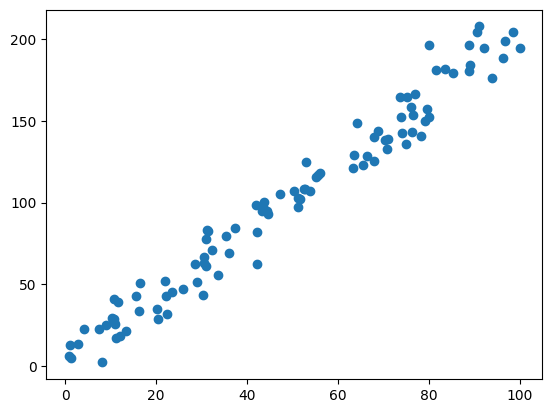

In [8]:
m_true = 2.0
c_true = 4.5
N = 100

x = (torch.rand(N)*100)
y = (m_true * x + c_true) + torch.randn(N)*10

plt.figure()
plt.scatter(x, y)

In [9]:
m = 0
c = 0

def error(x, y, m, c):
    y_pred = m * x + c
    e = ((y - y_pred)**2).sum()
    return e

print(error(x, y, m, c))

tensor(1353995.6250)


In [10]:
print(error(x, y, m_true, c_true))

tensor(10901.4492)


In [19]:
m = 0
c = 0

epochs = 100
eta = 1e-7

for epoch in range(epochs):
    y_pred = m * x + c
    dm = (-2*(y - y_pred) * x).sum()
    dc = (-2*(y - y_pred)).sum()

    m = m - eta * dm
    c = c - eta * dc

    print(epoch, error(x, y, m, c))

0 tensor(1189031.6250)
1 tensor(1044332.1250)
2 tensor(917407.8125)
3 tensor(806075.2500)
4 tensor(708419.)
5 tensor(622759.)
6 tensor(547621.6250)
7 tensor(481714.4688)
8 tensor(423903.3750)
9 tensor(373194.)
10 tensor(328713.8125)
11 tensor(289697.7500)
12 tensor(255474.4844)
13 tensor(225455.2812)
14 tensor(199123.6875)
15 tensor(176026.7500)
16 tensor(155767.0938)
17 tensor(137996.1562)
18 tensor(122408.2578)
19 tensor(108735.2109)
20 tensor(96741.7969)
21 tensor(86221.6641)
22 tensor(76993.8438)
23 tensor(68899.5781)
24 tensor(61799.6641)
25 tensor(55571.9062)
26 tensor(50109.1875)
27 tensor(45317.5156)
28 tensor(41114.4688)
29 tensor(37427.7266)
30 tensor(34193.8867)
31 tensor(31357.2852)
32 tensor(28869.1367)
33 tensor(26686.6523)
34 tensor(24772.2539)
35 tensor(23093.0449)
36 tensor(21620.0918)
37 tensor(20328.0898)
38 tensor(19194.7930)
39 tensor(18200.7070)
40 tensor(17328.7500)
41 tensor(16563.9004)
42 tensor(15893.0059)
43 tensor(15304.5293)
44 tensor(14788.3408)
45 tensor(

tensor(2.0545) tensor(0.0331)


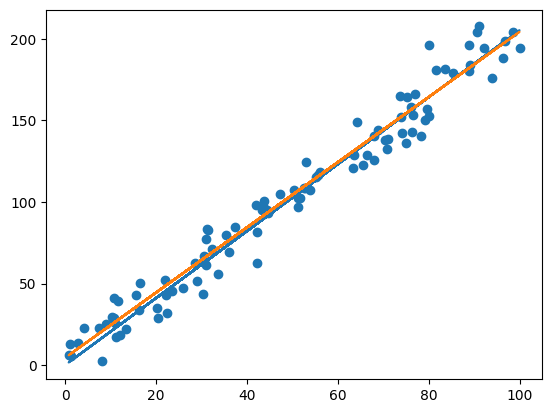

In [22]:
print(m, c)

plt.figure()
plt.scatter(x, y)
plt.plot(x, m*x+c)
plt.plot(x, m_true*x+c_true)

In [30]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        self.m = torch.nn.Parameter(torch.zeros(1))
        self.c = torch.nn.Parameter(torch.zeros(1))

    def forward(self, x):
        return self.m * x + self.c

In [32]:
model = LinearModel()

epochs = 100
eta = 1e-7

for epoch in range(epochs):
    model.m.grad = None
    model.c.grad = None
    
    y_pred = model(x)
    loss = torch.nn.functional.mse_loss(y_pred, y, reduction='sum')
    loss.backward()

    model.m.data = model.m.data - eta * model.m.grad
    model.c.data = model.c.data - eta * model.c.grad
    
    print(epoch, loss)

0 tensor(1353995.6250, grad_fn=<MseLossBackward0>)
1 tensor(1189031.6250, grad_fn=<MseLossBackward0>)
2 tensor(1044332.1250, grad_fn=<MseLossBackward0>)
3 tensor(917407.8125, grad_fn=<MseLossBackward0>)
4 tensor(806075.2500, grad_fn=<MseLossBackward0>)
5 tensor(708419., grad_fn=<MseLossBackward0>)
6 tensor(622759., grad_fn=<MseLossBackward0>)
7 tensor(547621.6250, grad_fn=<MseLossBackward0>)
8 tensor(481714.4688, grad_fn=<MseLossBackward0>)
9 tensor(423903.3750, grad_fn=<MseLossBackward0>)
10 tensor(373194., grad_fn=<MseLossBackward0>)
11 tensor(328713.8125, grad_fn=<MseLossBackward0>)
12 tensor(289697.7500, grad_fn=<MseLossBackward0>)
13 tensor(255474.4844, grad_fn=<MseLossBackward0>)
14 tensor(225455.2812, grad_fn=<MseLossBackward0>)
15 tensor(199123.6875, grad_fn=<MseLossBackward0>)
16 tensor(176026.7500, grad_fn=<MseLossBackward0>)
17 tensor(155767.0938, grad_fn=<MseLossBackward0>)
18 tensor(137996.1562, grad_fn=<MseLossBackward0>)
19 tensor(122408.2578, grad_fn=<MseLossBackward0>)

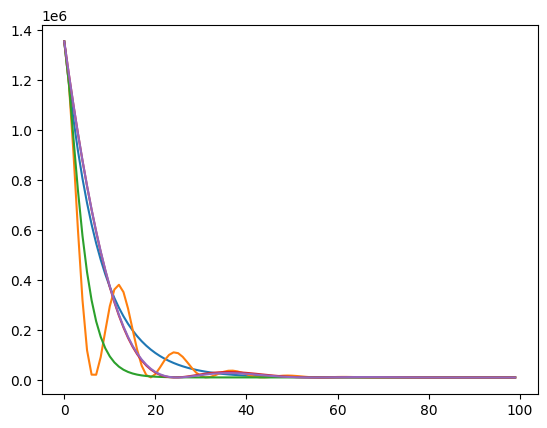

In [43]:
model = LinearModel()

epochs = 100
eta = 1e-7

optims = [
    torch.optim.SGD(model.parameters(), lr=eta),
    torch.optim.SGD(model.parameters(), lr=eta, momentum=0.9),
    torch.optim.SGD(model.parameters(), lr=eta, momentum=0.5),
    torch.optim.Adam(model.parameters(), lr=1e-1),
    torch.optim.AdamW(model.parameters(), lr=1e-1),
]

plt.figure()
for optim in optims:
    model.m.data *= 0 
    model.c.data *= 0 
    
    losses = []
    for epoch in range(epochs):
        optim.zero_grad()
        
        y_pred = model(x)
        loss = torch.nn.functional.mse_loss(y_pred, y, reduction='sum')
        loss.backward()
    
        optim.step()
        
        losses.append(loss.detach())
    
    plt.plot(range(epochs), losses)

In [46]:
torch.zeros(1000,1000).to("mps") @ torch.zeros(1000,1000).to("mps")

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='mps:0')

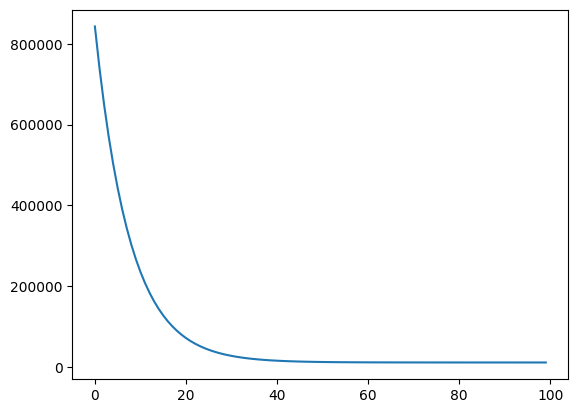

In [52]:
# model = LinearModel()
model = torch.nn.Linear(1, 1)

epochs = 100
eta = 1e-7

optim = torch.optim.SGD(model.parameters(), lr=eta)

losses = []
for epoch in range(epochs):
    optim.zero_grad()

    y_pred = model(x.unsqueeze(1))
    loss = torch.nn.functional.mse_loss(y_pred, y.unsqueeze(1), reduction='sum')
    loss.backward()

    optim.step()
    
    losses.append(loss.detach())

plt.figure()
plt.plot(range(epochs), losses)

In [88]:
m_true = torch.arange(0, 10).float()

c_true = 4.5
N = 100

x = (torch.rand(N, 10)*100)
y = (x @ m_true + c_true) + torch.randn(N)*10

print(x.shape, y.shape)

dataset = torch.utils.data.TensorDataset(x, y.unsqueeze(1))

torch.Size([100, 10]) torch.Size([100])


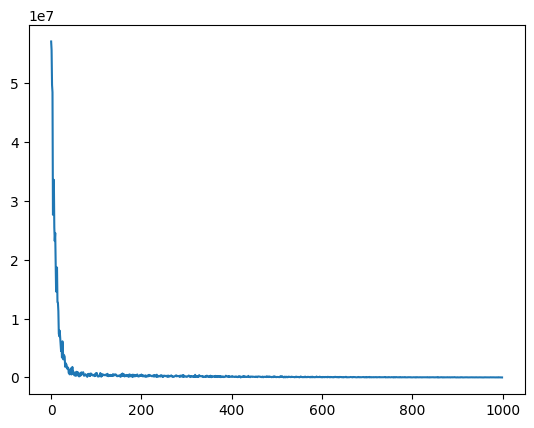

In [93]:
loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

model = torch.nn.Linear(10, 1)

epochs = 100
eta = 1e-7

optim = torch.optim.SGD(model.parameters(), lr=eta)

losses = []
for epoch in range(epochs):
    for xb, yb in loader:
        optim.zero_grad()
    
        y_pred = model(xb)
        loss = torch.nn.functional.mse_loss(y_pred, yb, reduction='sum')
        loss.backward()
    
        optim.step()
        
        losses.append(loss.detach())

plt.figure()
plt.plot(range(len(losses)), losses)